# Rainfall Prediction - Weather Forecasting

1.Problem Statement: 

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

### Importing Required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [2]:
 pd.set_option('display.max_columns', 25)

In [3]:
df=pd.read_csv("weatherAUS.csv")
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [4]:
df=df.drop(columns='Date')

In [5]:
df.shape

(8425, 22)

The dataset is having 8425 rows and 23 columns

In [6]:
df.isna().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [7]:
df.nunique()

Location          12
MinTemp          285
MaxTemp          331
Rainfall         250
Evaporation      116
Sunshine         140
WindGustDir       16
WindGustSpeed     52
WindDir9am        16
WindDir3pm        16
WindSpeed9am      34
WindSpeed3pm      35
Humidity9am       90
Humidity3pm       94
Pressure9am      384
Pressure3pm      374
Cloud9am           9
Cloud3pm           9
Temp9am          304
Temp3pm          328
RainToday          2
RainTomorrow       2
dtype: int64

By looking at these unique types we can say one of our target variable 'RainTomorrow' has 2 classes making it a classification problem while predicting tomorrows rainfall and the other target Rainfall is a continuous data making it a regression problem.

In [8]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [9]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8350 non-null   float64
 2   MaxTemp        8365 non-null   float64
 3   Rainfall       8185 non-null   float64
 4   Evaporation    4913 non-null   float64
 5   Sunshine       4431 non-null   float64
 6   WindGustDir    7434 non-null   object 
 7   WindGustSpeed  7434 non-null   float64
 8   WindDir9am     7596 non-null   object 
 9   WindDir3pm     8117 non-null   object 
 10  WindSpeed9am   8349 non-null   float64
 11  WindSpeed3pm   8318 non-null   float64
 12  Humidity9am    8366 non-null   float64
 13  Humidity3pm    8323 non-null   float64
 14  Pressure9am    7116 non-null   float64
 15  Pressure3pm    7113 non-null   float64
 16  Cloud9am       6004 non-null   float64
 17  Cloud3pm       5970 non-null   float64
 18  Temp9am 

# Data Cleaning

### Treating the Null Values by Imputation

In [11]:
#Filling null values in MinTemp with it's mean
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())

#Filling null values in MaxTemp with it's mean
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())

#Fillinf null values in Rainfall with it's mode, as most of the rows have 0 rainfall.
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mode()[0])

#Filling null values in Evaporation with it's mean
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())

#Filling null values in Sunshine with it's mean
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())

#Filling null values in WindGustDir with it's mode
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])

#Filling null values in WindGustSpeed with it's mean
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())

#Filling null values in WindDir9am with it's mode
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])

#Filling null values in WindDir3pm with it's mode
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

#Filling null values in WindSpeed9am with it's mean
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())

#Filling null values in WindSpeed3pm with it's mean
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())

#Filling null values in Humidity9am with it's mean
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())

#Filling null values in Humidity3pm with it's mean
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())

#Filling null values in Pressure9am with it's mean
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())

#Filling null values in Pressure3pm with it's mean
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())

#Filling null values in Cloud9am with it's mean
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())

#Filling null values in Cloud3pm with it's mean
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())

#Filling null values in Temp9am with it's mean
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())

#Filling null values in Temp3pm with it's mean
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

#Filling null values in Temp3pm with it's mean
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

#Filling null values in RainToday with it's mode
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])

#Filling null values in RainTomorrow with it's mode
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [12]:
df.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

We can clearly see now that we have removed all the null values.

# Statistical Overview of the Dataset

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,8425.0,13.193305,5.379488,-2.0,9.300000,13.200000,17.300000,28.5
MaxTemp,8425.0,23.859976,6.114516,8.2,19.300000,23.300000,28.000000,45.5
Rainfall,8425.0,2.725982,10.319872,0.0,0.000000,0.000000,0.800000,371.0
Evaporation,8425.0,5.389395,3.852004,0.0,4.000000,5.389395,5.389395,145.0
Sunshine,8425.0,7.632205,2.825451,0.0,7.632205,7.632205,8.900000,13.9
WindGustSpeed,8425.0,40.174469,13.776101,7.0,31.000000,40.174469,48.000000,107.0
WindSpeed9am,8425.0,13.847646,10.128579,0.0,6.000000,13.000000,20.000000,63.0
WindSpeed3pm,8425.0,18.533662,9.704759,0.0,11.000000,19.000000,24.000000,83.0
Humidity9am,8425.0,67.822496,16.774231,10.0,56.000000,68.000000,80.000000,100.0
Humidity3pm,8425.0,51.249790,18.311894,6.0,39.000000,51.000000,63.000000,99.0


### Checking the categorical columns and numerical columns

In [14]:
#checking categorical columns
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [15]:
# checking for numerical columns
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print(num_col)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


# EDA 

### Univariate Analysis

In [16]:
df_cat=df[cat_col]

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


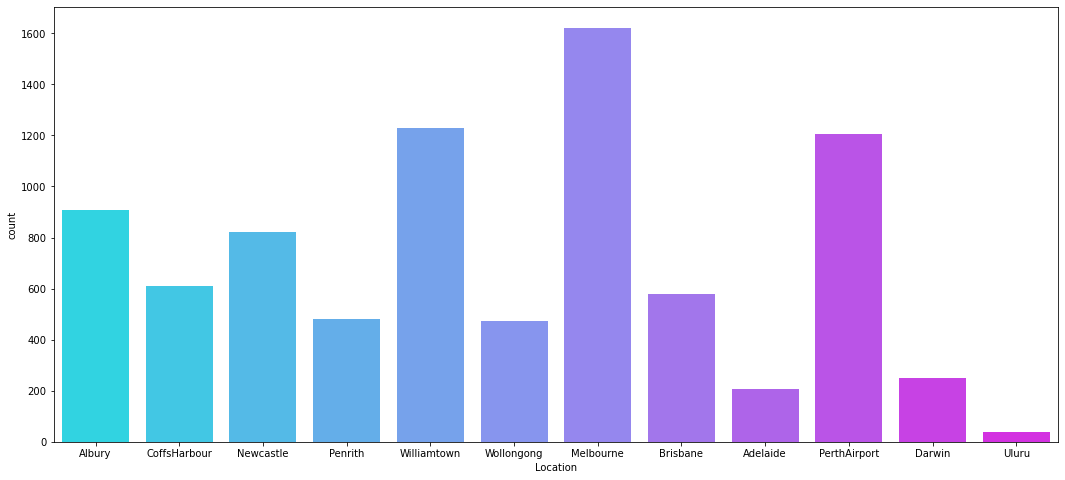

In [17]:
plt.figure(figsize=(18,8))
ax=sns.countplot(x='Location',data=df_cat,palette='cool')
print(df_cat['Location'].value_counts())

N      1704
SSE     578
S       577
SW      572
E       557
WNW     531
W       507
WSW     504
SE      484
ENE     415
SSW     396
NW      383
NE      353
NNE     343
ESE     302
NNW     219
Name: WindGustDir, dtype: int64


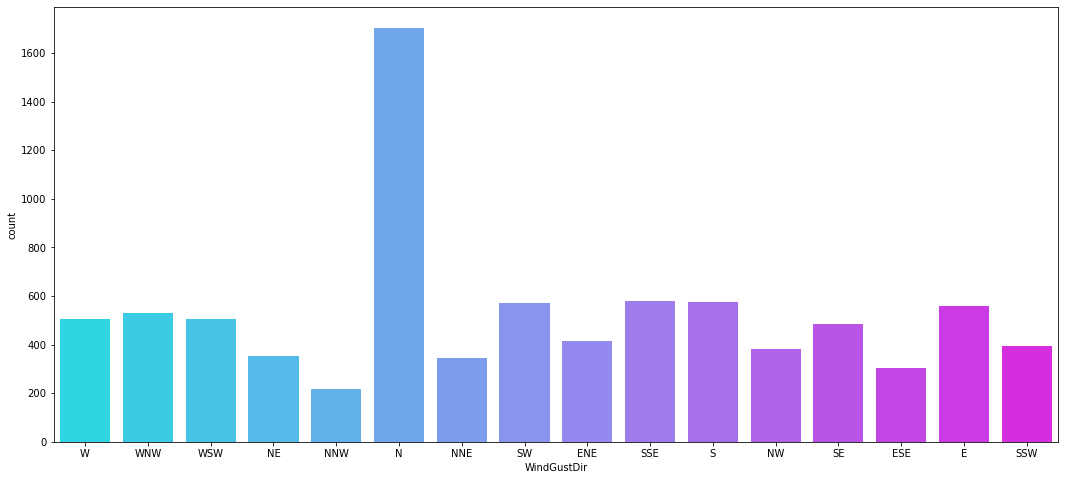

In [18]:
plt.figure(figsize=(18,8))
ax=sns.countplot(x='WindGustDir',data=df_cat,palette='cool')
print(df_cat['WindGustDir'].value_counts())

N      1735
SW      704
NW      625
WSW     543
SE      505
WNW     480
SSW     467
ENE     433
NNE     430
W       414
NE      409
S       402
E       380
SSE     365
NNW     280
ESE     253
Name: WindDir9am, dtype: int64


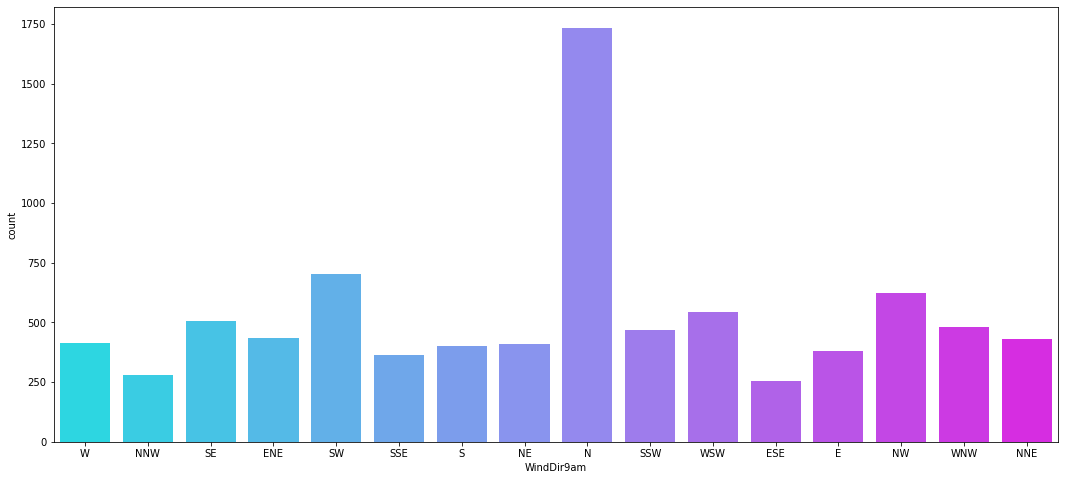

In [19]:
plt.figure(figsize=(18,8))
ax=sns.countplot(x='WindDir9am',data=df_cat,palette='cool')
print(df_cat['WindDir9am'].value_counts())

SE     1121
S       742
SSE     623
WSW     580
NE      544
N       524
SW      494
WNW     487
NW      468
W       462
ESE     462
E       460
ENE     417
SSW     370
NNE     365
NNW     306
Name: WindDir3pm, dtype: int64


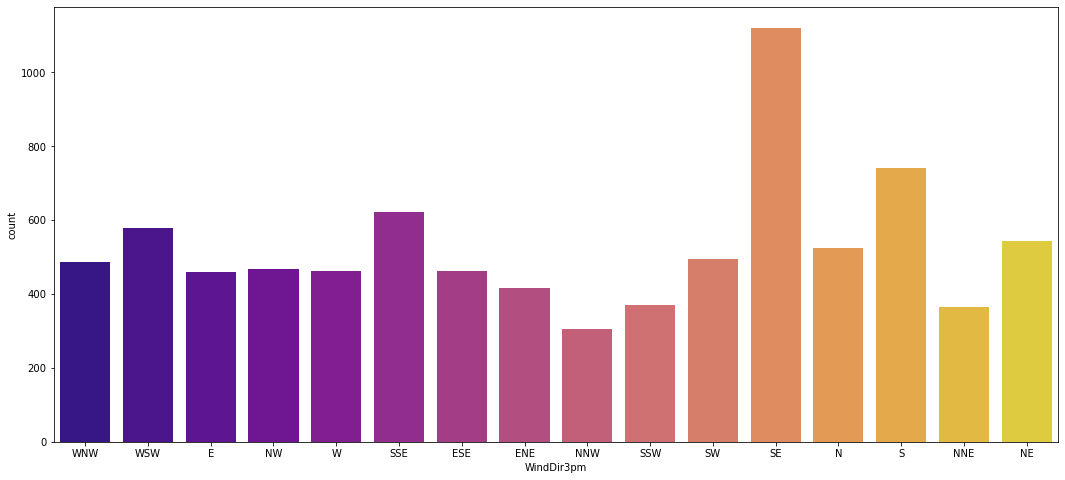

In [20]:
plt.figure(figsize=(18,8))
ax=sns.countplot(x='WindDir3pm',data=df_cat,palette='plasma')
print(df_cat['WindDir3pm'].value_counts())

No     6435
Yes    1990
Name: RainToday, dtype: int64


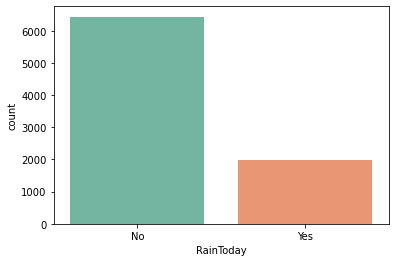

In [21]:
ax=sns.countplot(x='RainToday',data=df_cat,palette='Set2')
print(df_cat['RainToday'].value_counts())

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64


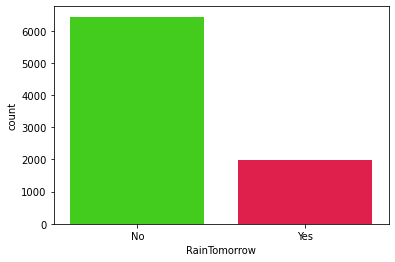

In [22]:
ax=sns.countplot(x='RainTomorrow',data=df_cat,palette='prism')
print(df_cat['RainTomorrow'].value_counts())

### Visualizing the distribution of the numerical columns

In [23]:
len(num_col)

16

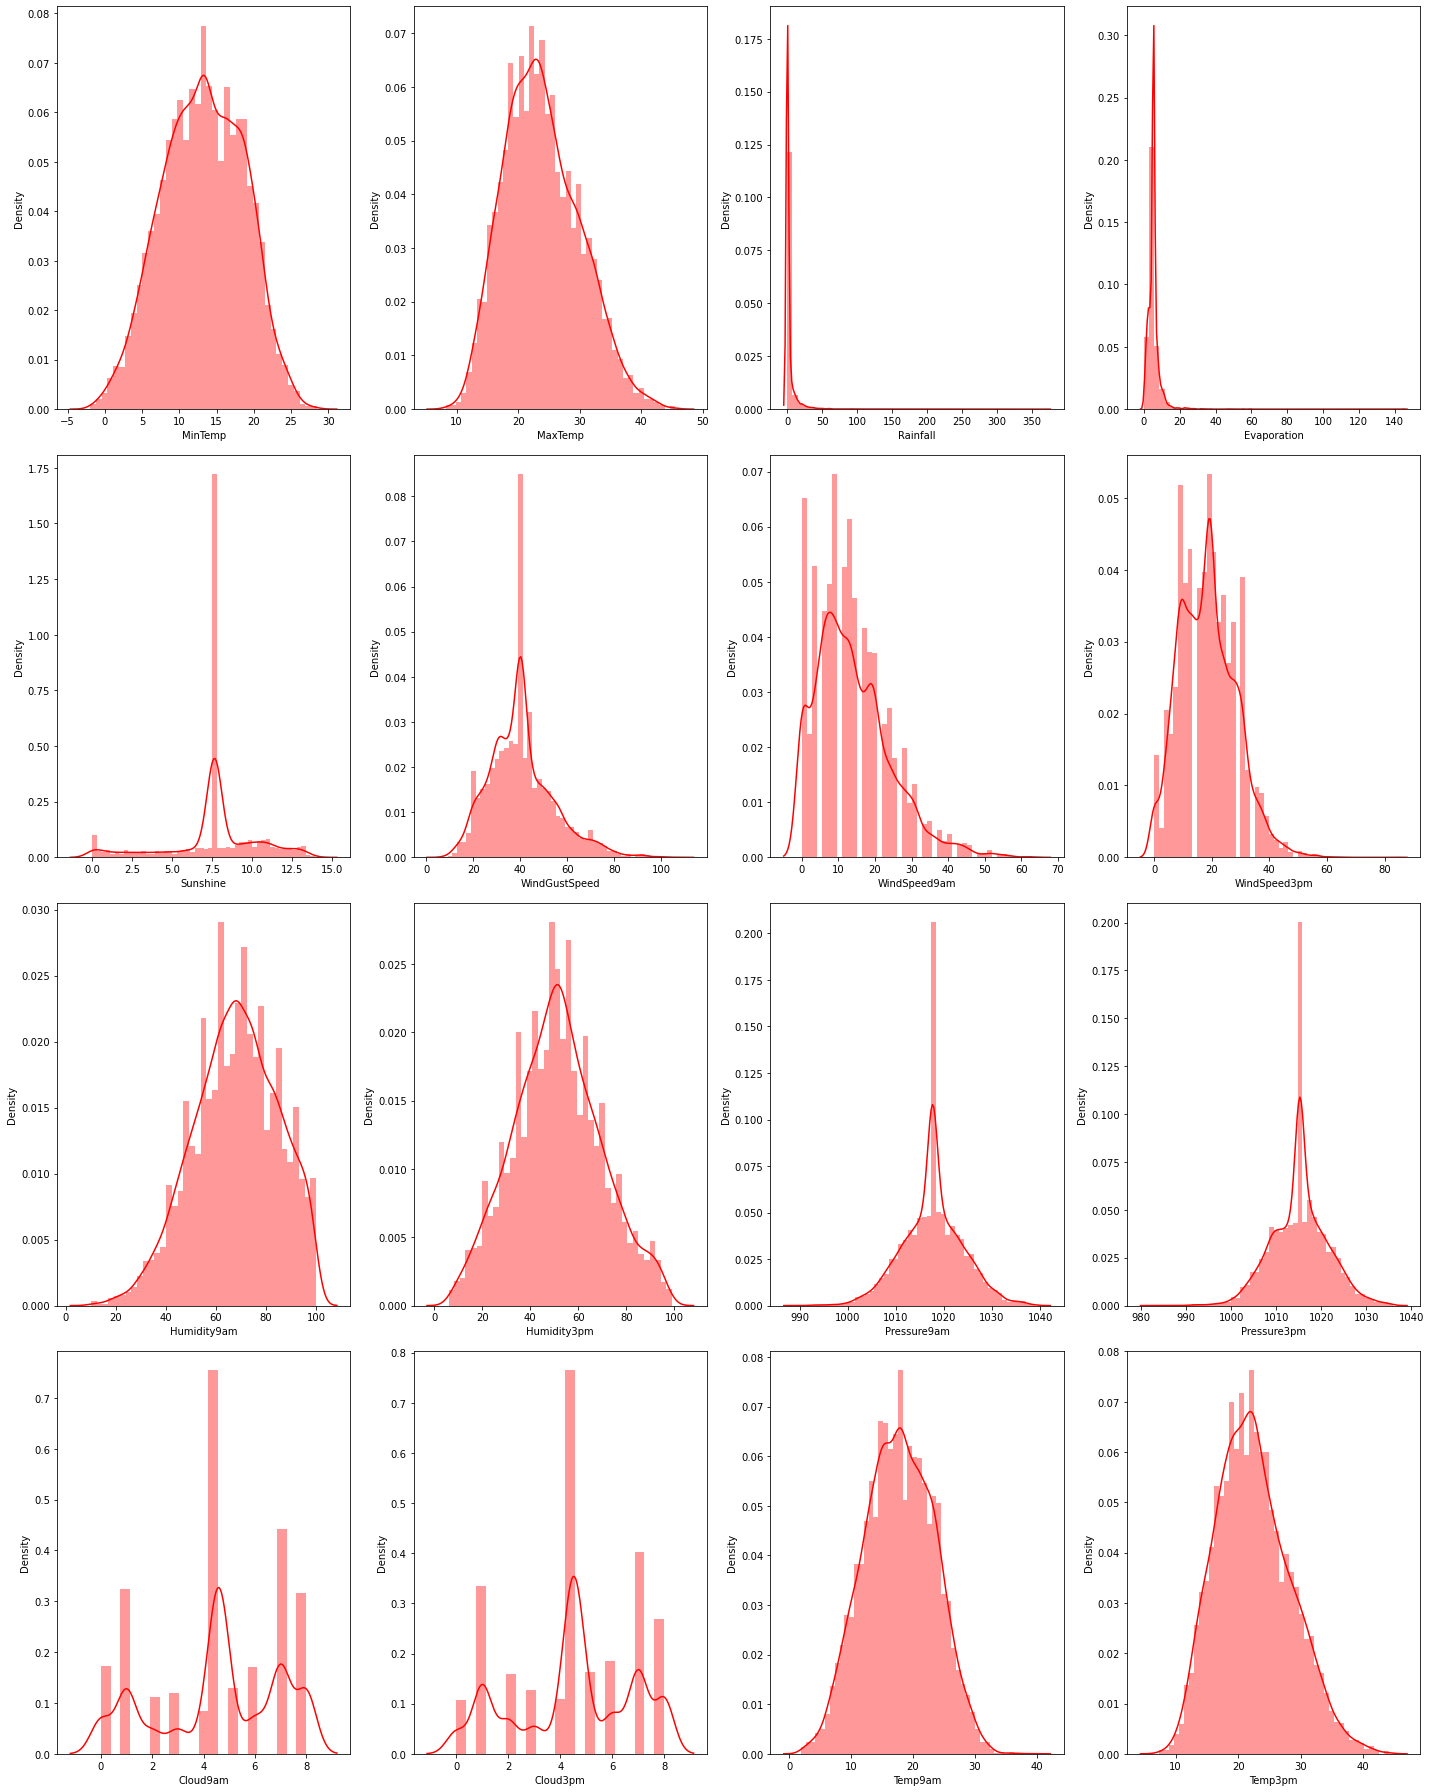

In [24]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column],color="r")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

From the graphs we can say that the dataset is not normally distributed.

Min Temp is normally distributed

Max Temp is slightly skewed right

Rainfall is skewed right

Evaporation is skewed right

Sunshine is not normally distributed

WindGustSpeed, WindSpeed9am,WindSpeed3pm is skewed right

Humidity9am is slightly skewed left and Humidity3pm is normally distributed.

Pressure9am, Pressure3pm, Cloud9am, Cloud3pm,Temp9am,Temp3pm,Day, Month and Year has no skewness however the data is not distributed normally

# Bivariate Analysis

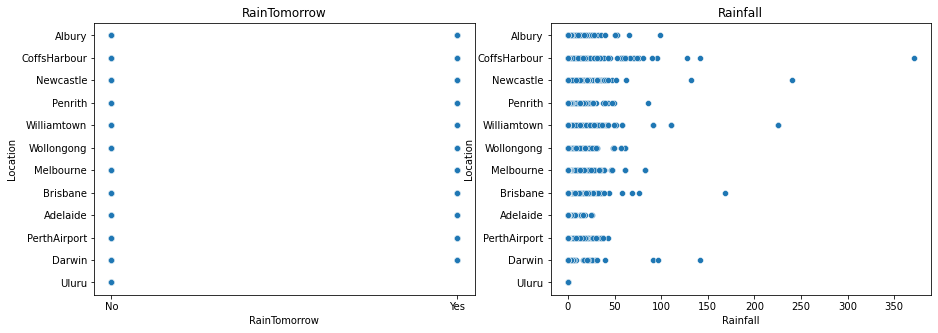

In [25]:
#checking the corelation between location with both the targets (Rainfall and Rain Tommorow)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('RainTomorrow')
sns.scatterplot(x='RainTomorrow',y='Location',data=df)
plt.subplot(1,2,2)
plt.title('Rainfall')
sns.scatterplot(x='Rainfall',y='Location',data=df)
plt.show()

We can see that location does not have any major impact on the prediction of rainfall, however we will not drop the feature as prediction is done as per reigion

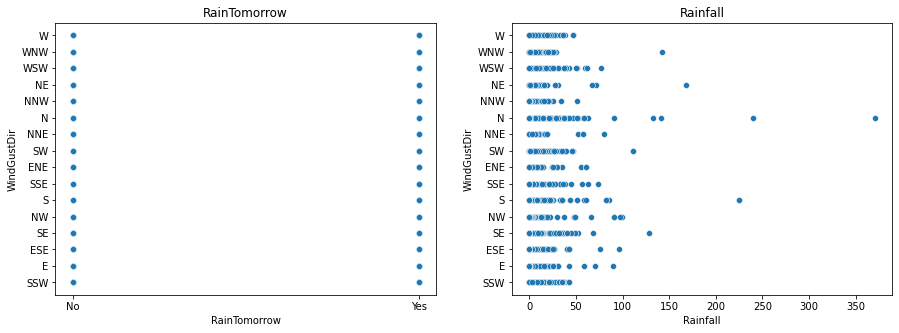

In [26]:
#checking the corelation between WindGustDir with both the targets (Rainfall and Rain Tommorow)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('RainTomorrow')
sns.scatterplot(x='RainTomorrow',y='WindGustDir',data=df)
plt.subplot(1,2,2)
plt.title('Rainfall')
sns.scatterplot(x='Rainfall',y='WindGustDir',data=df)
plt.show()


From this graph we can observe that we see no linear relation of the feature with both the targets

<AxesSubplot:xlabel='WindDir3pm', ylabel='Rainfall'>

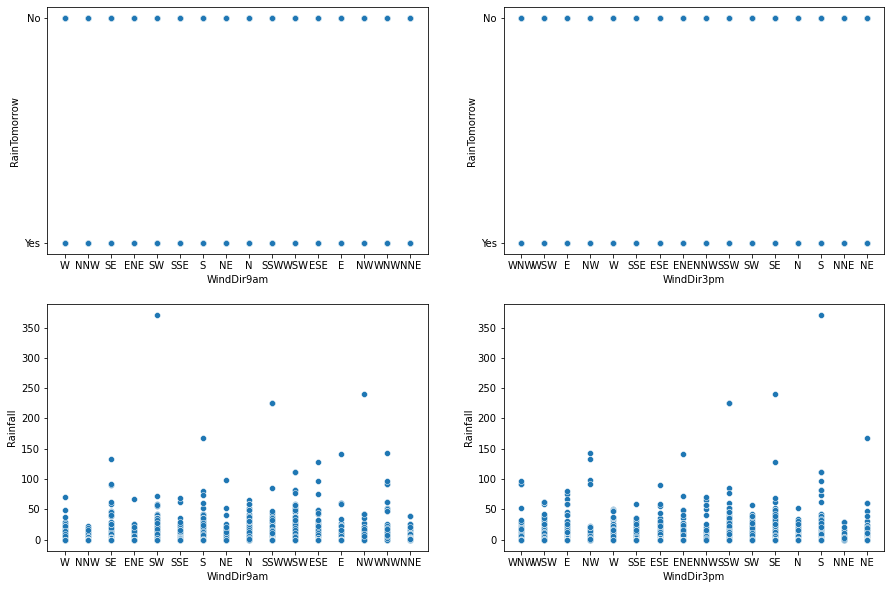

In [27]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between WindDir9am and RainTomorrow
sns.scatterplot(x='WindDir9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between WindDir3pm and RainTomorrow
sns.scatterplot(x='WindDir3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between WindDir9am and Rainfall
sns.scatterplot(x='WindDir9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between WindDir3pm and Rainfall
sns.scatterplot(x='WindDir3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

We donot see any linear relation either

Checking the relation between Rainfall today and Rainfall Tomorrow

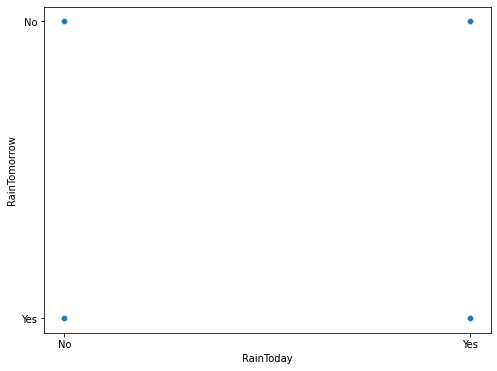

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['RainToday'],y=df['RainTomorrow'])
plt.show()

There is no relation that we can see.

<AxesSubplot:xlabel='MaxTemp', ylabel='Rainfall'>

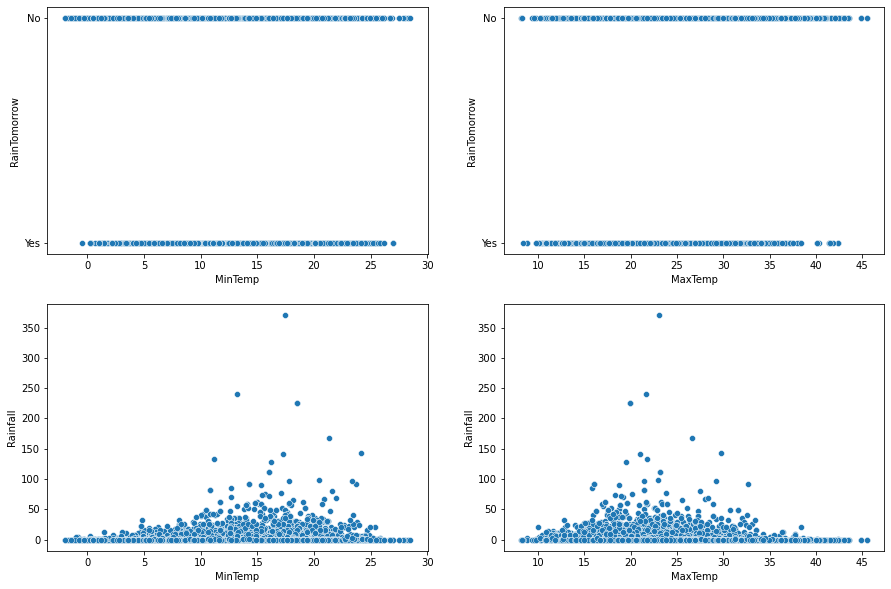

In [29]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between minimum temperature and RainTomorrow
sns.scatterplot(x='MinTemp',y='RainTomorrow',ax=axes[0,0],palette="green",data=df)

#checking the relation between max temperature and RainTomorrow
sns.scatterplot(x='MaxTemp',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between minimum temperature and Rainfall
sns.scatterplot(x='MinTemp',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between max temperature and Rainfall
sns.scatterplot(x='MaxTemp',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

We can clearly see from the plotted graphs that there is no linear relation of max temp and min temp with both the targets

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

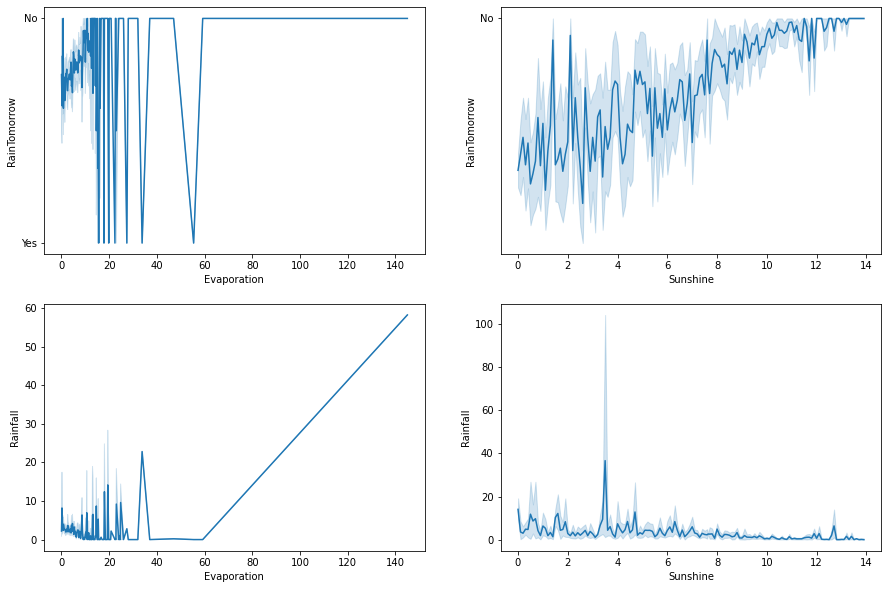

In [30]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Evaporation and RainTomorrow
sns.lineplot(x='Evaporation',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Sunshine and RainTomorrow
sns.lineplot(x='Sunshine',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Evaporation and Rainfall
sns.lineplot(x='Evaporation',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Sunshine and Rainfall
sns.lineplot(x='Sunshine',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)


We can clearly see the relation in the graphs

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Rainfall'>

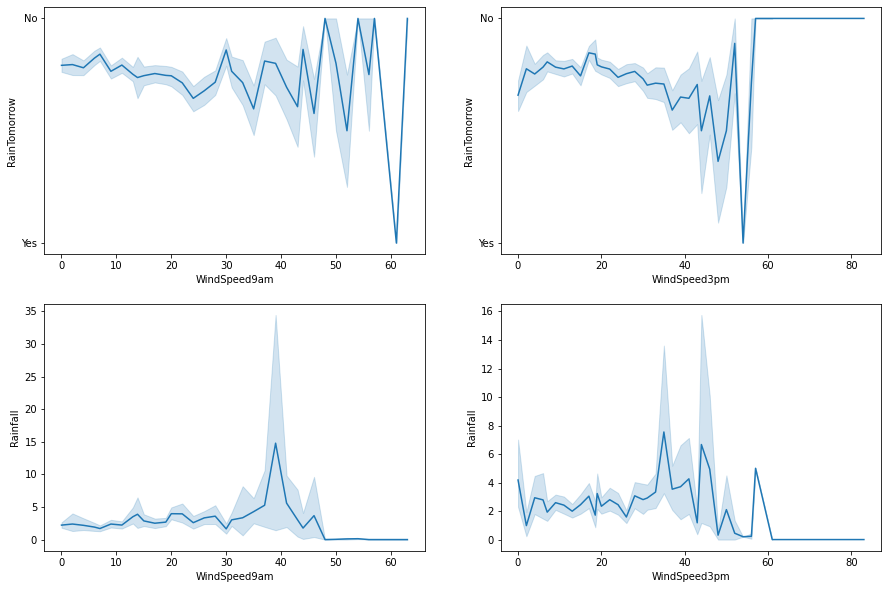

In [31]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between WindSpeed9am and RainTomorrow
sns.lineplot(x='WindSpeed9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between WindSpeed3pm and RainTomorrow
sns.lineplot(x='WindSpeed3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between WindSpeed9am and Rainfall
sns.lineplot(x='WindSpeed9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between WindSpeed3pm and Rainfall
sns.lineplot(x='WindSpeed3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

There is no linear relaion seen

<AxesSubplot:xlabel='Humidity3pm', ylabel='Rainfall'>

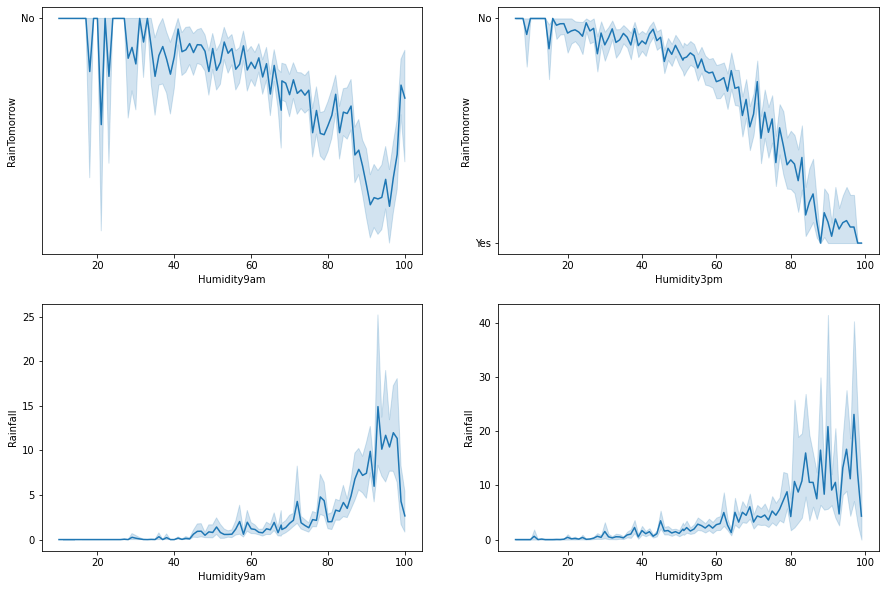

In [32]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Humidity9am and RainTomorrow
sns.lineplot(x='Humidity9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Humidity3pm and RainTomorrow
sns.lineplot(x='Humidity3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Humidity9am and Rainfall
sns.lineplot(x='Humidity9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Humidity3pm and Rainfall
sns.lineplot(x='Humidity3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)


Here we can see a inverse relation in humidity with rain tomorrow and positive relation between humidity and Rainfall

<AxesSubplot:xlabel='Cloud3pm', ylabel='Rainfall'>

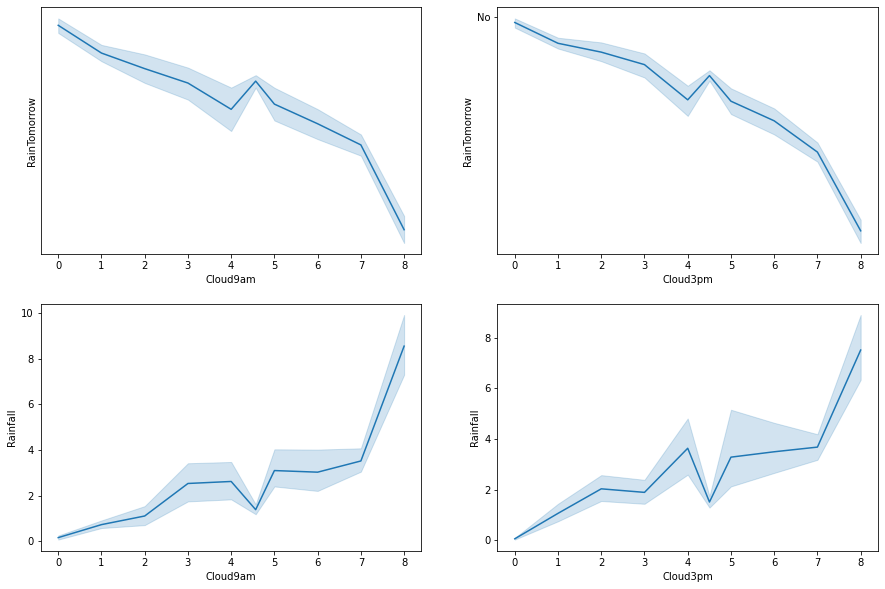

In [33]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Cloud9am and RainTomorrow
sns.lineplot(x='Cloud9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Cloud3pm and RainTomorrow
sns.lineplot(x='Cloud3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Cloud9am and Rainfall
sns.lineplot(x='Cloud9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Cloud3pm and Rainfall
sns.lineplot(x='Cloud3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)


The graph shows a linear relationship, and inverse relation between could and rain tomorrow and a positive relation between could and rainfall.`

<AxesSubplot:xlabel='Temp3pm', ylabel='Rainfall'>

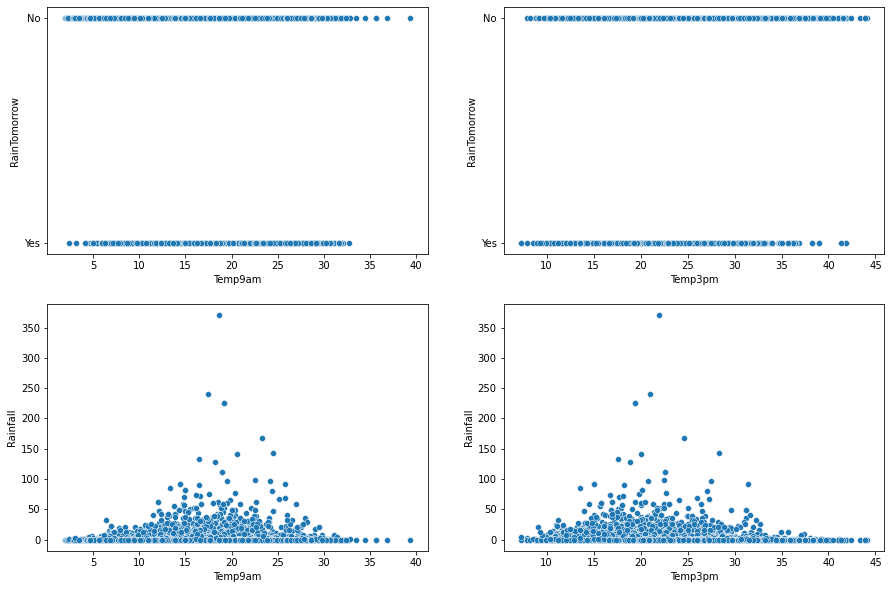

In [34]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Temp9am and RainTomorrow
sns.scatterplot(x='Temp9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Temp3pm and RainTomorrow
sns.scatterplot(x='Temp3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Temp9am and Rainfall
sns.scatterplot(x='Temp9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Temp3pm and Rainfall
sns.scatterplot(x='Temp3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

There is no linear relation that is seen in these plots.

### Now using encoder to encode the target variable

In [35]:
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()

for i in cat_col:
    df[i]=enc.fit_transform(df[i])
    

In [36]:
df.dtypes

Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
RainTomorrow       int32
dtype: object

# Multivariate Analysis

### Checking for Corrrelation(Plotting heatmap)

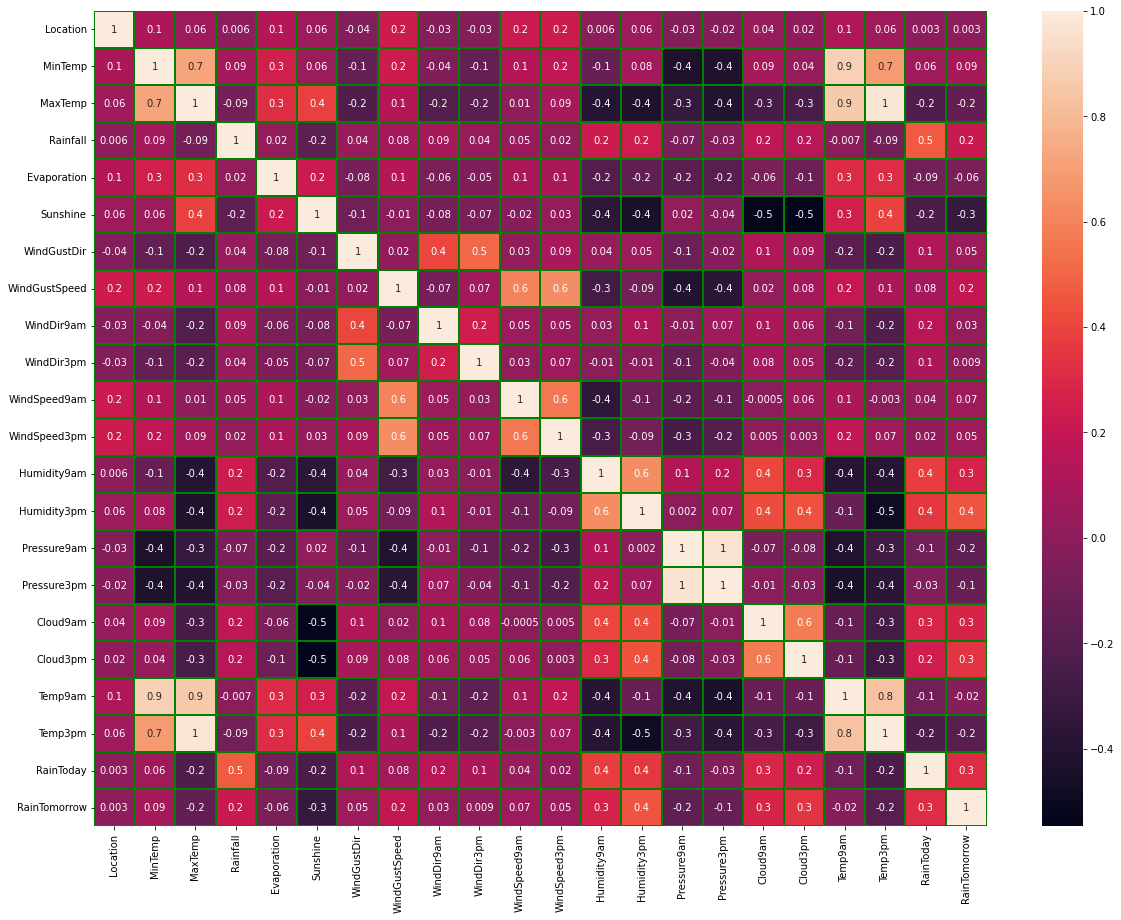

In [37]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=.1,fmt=".1g",linecolor="green",annot=True)
plt.yticks(rotation=0);

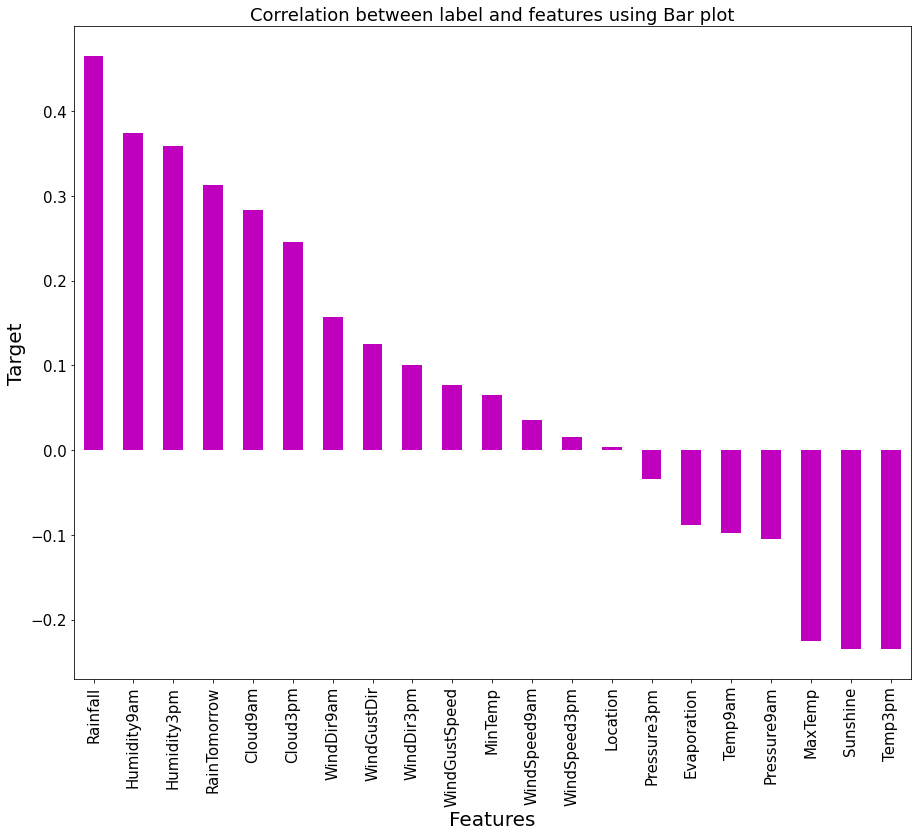

In [38]:
plt.figure(figsize=(15,12))
df.corr()['RainToday'].sort_values(ascending=False).drop(['RainToday']).plot(kind='bar',color='m',fontsize=15)
plt.xlabel('Features',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation between label and features using Bar plot',fontsize=18)
plt.show()

# Identifying the Outliers

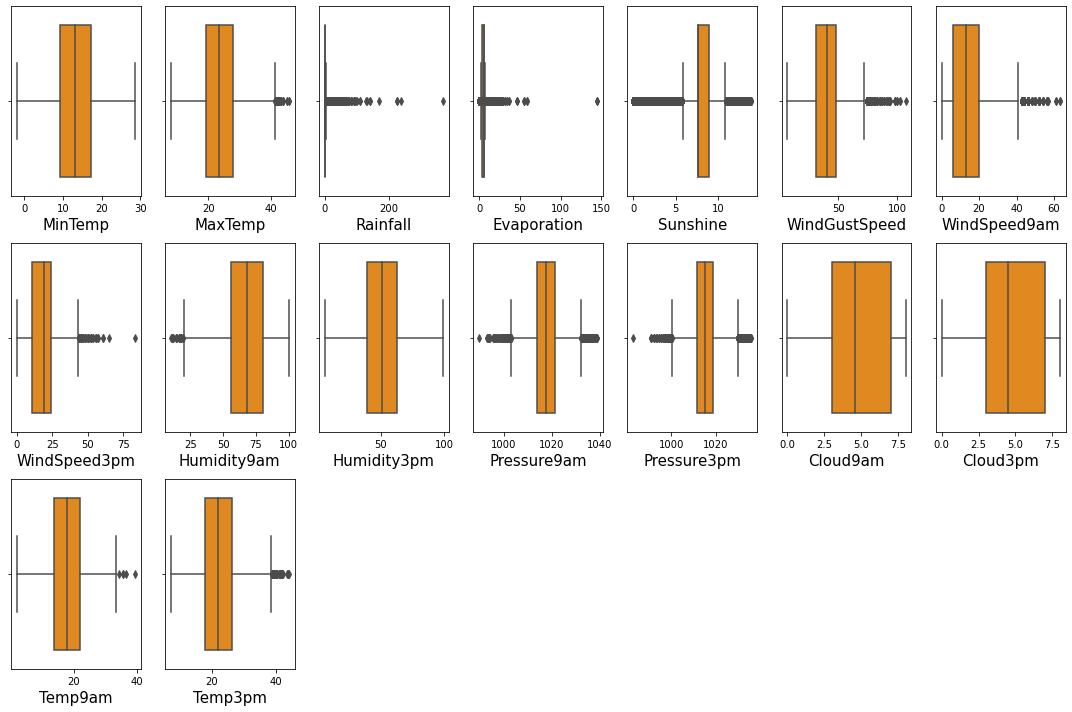

In [39]:
# Identifying the outliers using boxplot
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=20:
        ax=plt.subplot(3,7,plotnumber)
        sns.boxplot(df[column],color="darkorange")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

From the above boxplots, we can see that features having outliers are: MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am,Windspeed3pm, Humidity9am, Pressure9am, Pressure3pm, Temp9am, Temp3pm



# Checking the skewness of the dataset

In [40]:
df_cont=df[num_col]

In [41]:
df_cont.skew().sort_values()


Sunshine         -0.716525
Cloud9am         -0.366503
Cloud3pm         -0.276294
Humidity9am      -0.256743
MinTemp          -0.089989
Pressure9am      -0.024082
Temp9am          -0.014748
Pressure3pm      -0.010214
Humidity3pm       0.118281
MaxTemp           0.380654
Temp3pm           0.397331
WindSpeed3pm      0.494217
WindGustSpeed     0.757000
WindSpeed9am      0.960591
Rainfall         13.200523
Evaporation      14.023948
dtype: float64

We can observe that columns Rainfall and Evaporation has high skewness values that we need to remove

# DataPreprocessing

### Removing skewness using data transforamtion

In [42]:
cols=['Sunshine','Rainfall','Evaporation','WindSpeed9am','WindGustSpeed']

In [43]:
from sklearn.preprocessing import power_transform

df[cols]=power_transform(df[cols],method='yeo-johnson')

In [44]:
df.skew().sort_values()

Cloud9am        -0.366503
Cloud3pm        -0.276294
Humidity9am     -0.256743
WindDir3pm      -0.119847
MinTemp         -0.089989
WindSpeed9am    -0.079333
Sunshine        -0.075544
Location        -0.050456
Pressure9am     -0.024082
Temp9am         -0.014748
Pressure3pm     -0.010214
WindGustSpeed    0.010481
Evaporation      0.080305
Humidity3pm      0.118281
WindGustDir      0.119640
WindDir9am       0.172792
MaxTemp          0.380654
Temp3pm          0.397331
WindSpeed3pm     0.494217
Rainfall         1.028215
RainTomorrow     1.241588
RainToday        1.242362
dtype: float64

We can observe that skewness has been removed from the required features

### Removing Outliers using Z-technique

In [45]:
from scipy.stats import zscore
z=np.abs(zscore(df[num_col]))
z.shape
z

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.038425,1.570089e-01,0.677035,0.195503,0.082709,0.380260,0.717901,0.563297,0.189439,1.597406,1.584003,1.308665,1.413459,3.862851e-16,0.153712,0.108138
1,1.076989,2.028121e-01,0.659667,0.195503,0.082709,0.380260,0.990902,0.357200,1.420268,1.433568,1.121880,1.196072,0.000000,3.862851e-16,0.100217,0.312348
2,0.054526,3.009450e-01,0.659667,0.195503,0.082709,0.515699,0.638532,0.769394,1.777981,1.160505,1.599939,1.051309,0.000000,1.088680e+00,0.577390,0.127334
3,0.742365,6.771214e-01,0.659667,0.195503,0.082709,1.265782,0.090148,0.982428,1.360650,1.925081,0.006411,0.391836,0.000000,3.862851e-16,0.060269,0.682376
4,0.800625,1.380408e+00,1.038925,0.195503,0.082709,0.169468,0.554287,0.151104,0.845246,0.996668,1.090010,1.485596,1.001777,1.520830e+00,0.006773,1.220599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1.932140,7.523137e-02,0.659667,0.195503,0.082709,0.614550,0.111309,0.776331,1.002937,1.488181,1.109058,0.814518,0.000000,3.862851e-16,1.366273,0.007221
8421,1.783418,2.355231e-01,0.659667,0.195503,0.082709,1.473608,0.111309,0.982428,0.704843,1.652018,0.933770,0.621501,0.000000,3.862851e-16,1.223619,0.345987
8422,1.448794,4.972110e-01,0.659667,0.195503,0.082709,0.127602,0.310018,0.982428,0.883699,1.488181,0.535388,0.251553,0.000000,3.862851e-16,0.938310,0.615099
8423,1.002628,5.135665e-01,0.659667,0.195503,0.082709,0.880853,0.111309,1.188525,1.002937,1.488181,0.280424,0.203299,0.644950,1.088680e+00,0.474684,0.598279


In [46]:
df_new=df[(z<3).all(axis=1)]
print("old dataframe",df.shape)
print("new dataframe",df_new.shape)
print("total number of rows dropped",df.shape[0]-df_new.shape[0])

old dataframe (8425, 22)
new dataframe (8142, 22)
total number of rows dropped 283


We can observe that total number of rows dropped is 229

### Percentage data loss

In [47]:
loss_percent=(8425-8196)/8425*100
loss_percent


2.7181008902077153

We can see that data loss is less than 10%.So its safe to remove outliers

### Separating features and target variable as x and y

In [48]:
x=df_new.drop(columns=['RainTomorrow'],axis=1)
y=df_new['RainTomorrow']

# Handling imbalanced dataset

In [49]:
df['RainTomorrow'].value_counts()

0    6434
1    1991
Name: RainTomorrow, dtype: int64

We can observe that dataset is imbalanced , we need to balance it

### Over sampling using SMOTE

In [50]:
import sys
from collections import Counter
import joblib
import six
from sklearn.model_selection import train_test_split
sys.modules['sklearn.externals.six']=six
sys.modules['sklearn.externals.joblib']=joblib
from sklearn.model_selection import train_test_split

In [51]:
from imblearn.over_sampling import SMOTE

over_smpl=SMOTE(0.8)
x,y=over_smpl.fit_resample(x,y)

y.value_counts()

0    6232
1    4985
Name: RainTomorrow, dtype: int64

# Data Standardisation

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,-1.533384,-0.021738,-0.089092,0.501280,0.284664,0.069151,1.278069,0.328178,1.284608,1.459493,0.720334,0.582900,0.052550,-1.752864,-1.583247,-1.313389,1.320983,-0.176802,-0.157743,-0.020538,-0.587886
1,-1.533384,-1.162550,0.285699,-0.784434,0.284664,0.069151,1.497534,0.328178,-0.274350,1.691793,-1.026051,0.372579,-1.586592,-1.595085,-1.099674,-1.195411,-0.138571,-0.176802,-0.102248,0.414670,-0.587886
2,-1.533384,-0.116805,0.387915,-0.784434,0.284664,0.069151,1.716999,0.468016,1.284608,1.691793,0.639219,0.793221,-1.950846,-1.332120,-1.599922,-1.043724,-0.138571,-1.292432,0.600686,0.223178,-0.587886
3,-1.533384,-0.820306,0.779742,-0.784434,0.284664,0.069151,-0.697114,-1.371333,0.393775,-1.792711,-0.105487,-0.994506,-1.525883,-2.068422,0.067570,-0.352708,-0.138571,-0.176802,0.064236,0.797653,-0.587886
4,-1.533384,0.757818,1.512288,0.849366,0.284664,0.069151,1.278069,0.110539,-1.387891,-0.166609,-0.579833,0.162258,0.720348,-1.174341,-1.066324,-1.498783,0.895876,1.381675,0.008742,1.354720,-0.587886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11212,-0.228007,-0.213664,0.923516,-0.784434,0.631078,1.013852,1.058604,1.409290,-0.942475,-1.095810,1.461855,1.997142,-1.262630,-1.314432,-0.086841,-0.370318,-1.559453,0.044622,0.565763,0.931065,-0.587886
11213,0.098337,-0.993308,-0.883440,1.455653,-0.951971,-1.353047,1.058604,0.328178,1.061900,0.065691,0.786291,0.298332,0.451327,-0.209101,-0.251865,0.301636,0.712518,-0.352698,-1.083748,-0.791287,1.701011
11214,-0.880695,1.302448,1.787783,0.047422,1.156106,0.483652,-1.136044,0.788389,-0.274350,-1.095810,-0.001642,-0.506106,-0.129577,-1.049568,-1.315954,-1.838535,-0.138571,-0.176802,1.235276,1.938078,-0.587886
11215,0.098337,-0.366288,-1.446546,0.788066,-1.352636,-1.413555,1.058604,-0.481832,1.061900,0.530292,0.609858,-0.071960,1.176586,0.956473,1.613546,2.081683,1.005376,0.490306,-0.940556,-1.294246,-0.587886


# Check for multicollierinity

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif1']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif



,vif1,features
0,1.162880,Location
1,8.869799,MinTemp
2,24.857054,MaxTemp
3,5.355242,Rainfall
4,1.494035,Evaporation
5,2.025256,Sunshine
6,1.584327,WindGustDir
7,2.254538,WindGustSpeed
8,1.398886,WindDir9am
9,1.474388,WindDir3pm


In [54]:
x=x.drop(columns=['Temp3pm','MaxTemp'],axis=1)

In [55]:
vif=pd.DataFrame()
vif['vif1']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif


,vif1,features
0,1.160440,Location
1,8.813575,MinTemp
2,5.312982,Rainfall
3,1.478216,Evaporation
4,2.019195,Sunshine
5,1.581167,WindGustDir
6,2.231183,WindGustSpeed
7,1.388734,WindDir9am
8,1.472184,WindDir3pm
9,2.042345,WindSpeed9am


In [56]:
x=x.drop(columns=['Pressure9am'],axis=1)

In [57]:
vif=pd.DataFrame()
vif['vif1']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif


,vif1,features
0,1.160433,Location
1,8.656602,MinTemp
2,5.294265,Rainfall
3,1.469374,Evaporation
4,2.012109,Sunshine
5,1.559717,WindGustDir
6,2.212220,WindGustSpeed
7,1.349704,WindDir9am
8,1.397722,WindDir3pm
9,2.040728,WindSpeed9am


In [58]:
x=x.drop(columns=['Temp9am'],axis=1)

In [59]:
vif=pd.DataFrame()
vif['vif1']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif


,vif1,features
0,1.145659,Location
1,1.488868,MinTemp
2,5.291967,Rainfall
3,1.468670,Evaporation
4,1.981253,Sunshine
5,1.559705,WindGustDir
6,2.181609,WindGustSpeed
7,1.340583,WindDir9am
8,1.394271,WindDir3pm
9,1.968645,WindSpeed9am


We can see that multicollierinity has been removed

We can see that VIF value is less than 5 for all columns .So there is no multicollinearity

# ----------------------------------------Prediction for Rain-Tomorrow---------------------------


# Model Training and Building

# Support Vector Machine(SVM)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,confusion_matrix

### Finding the best random state

In [61]:
max_acc=0
max_rs=0

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    svm=SVC()
    svm.fit(x_train,y_train)
    pred_svm=svm.predict(x_test)
    accuracy=accuracy_score(y_test,pred_svm)
    
    if accuracy>max_acc:
        max_acc=accuracy
        max_rs=i
print("Best accuracy is ",max_acc,"at random_state",max_rs)
        

Best accuracy is  0.8663101604278075 at random_state 50


In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=max_rs,test_size=0.20)

In [63]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print(f"Accuracy score in training:{accuracy_score(y_train,y_pred)*100:2f}%")
        
    elif train==False:
        pred=clf.predict(x_test)
        print(f"Accuracy score in testing:{accuracy_score(y_test,pred)*100:2f}%")
        
        print("Classification report\n",classification_report(y_test,pred,digits=2))

In [64]:
svm.fit(x_train,y_train)

SVC()

In [65]:
metric_score(svm,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:86.882871%


In [66]:
metric_score(svm,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:86.631016%
Classification report
               precision    recall  f1-score   support

           0       0.90      0.86      0.88      1259
           1       0.83      0.87      0.85       985

    accuracy                           0.87      2244
   macro avg       0.86      0.87      0.86      2244
weighted avg       0.87      0.87      0.87      2244



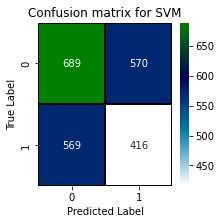

In [67]:
# Lets plot confusion matrix for SVM
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,pred_svm)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f , ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for SVM")
plt.show()

# Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf.fit(x_train,y_train)

RandomForestClassifier()

In [69]:
metric_score(rf,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:99.855121%


In [70]:
metric_score(rf,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:92.959002%
Classification report
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      1259
           1       0.92      0.92      0.92       985

    accuracy                           0.93      2244
   macro avg       0.93      0.93      0.93      2244
weighted avg       0.93      0.93      0.93      2244



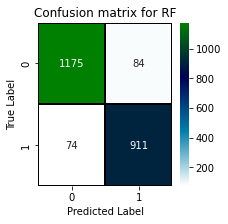

In [71]:
# Lets plot confusion matrix for RF
pred_rf=rf.predict(x_test)
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,pred_rf)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f , ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for RF")
plt.show()

# KNN

In [72]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(x_train,y_train)

KNeighborsClassifier()

In [73]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:90.382258%


In [74]:
metric_score(knn,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:86.140820%
Classification report
               precision    recall  f1-score   support

           0       0.93      0.81      0.87      1259
           1       0.80      0.92      0.85       985

    accuracy                           0.86      2244
   macro avg       0.86      0.87      0.86      2244
weighted avg       0.87      0.86      0.86      2244



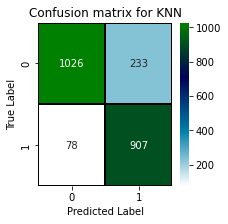

In [75]:
# Lets plot confusion matrix for KNN
pred_knn=knn.predict(x_test)
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,pred_knn)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f , ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for KNN")
plt.show()


# Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [77]:
metric_score(dt,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:99.855121%


In [78]:
metric_score(dt,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:87.299465%
Classification report
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      1259
           1       0.85      0.87      0.86       985

    accuracy                           0.87      2244
   macro avg       0.87      0.87      0.87      2244
weighted avg       0.87      0.87      0.87      2244



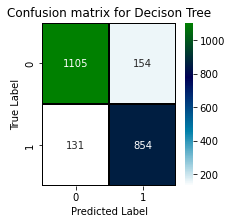

In [79]:
# Lets plot confusion matrix for Decision Tree
pred_dt=dt.predict(x_test)
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,pred_dt)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f , ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for Decison Tree")
plt.show()

# Cross Validation Score

### Finding best Cross validation value

In [80]:
pred_rf=rf.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_rf)
for j in range(2,10):
    cv_score=cross_val_score(rf,x,y,cv=j)
    cv_score_mean=cv_score.mean()
    print("cv at ", j)
    print("Cross validation score is :-", cv_score_mean*100)
    print()

cv at  2
Cross validation score is :- 65.00829018423366

cv at  3
Cross validation score is :- 69.13613265579032

cv at  4
Cross validation score is :- 72.40753596212186

cv at  5
Cross validation score is :- 80.32618016200928

cv at  6
Cross validation score is :- 75.37993474543376

cv at  7
Cross validation score is :- 81.15634131250917

cv at  8
Cross validation score is :- 84.60453984380322

cv at  9
Cross validation score is :- 84.43812859083666



In [81]:
from sklearn.model_selection import cross_val_score

lssscore_selected=cross_val_score(svm,x,y,cv=8).mean()
print("the cross validation score for SVM is ",lssscore_selected)

lssscore_selected=cross_val_score(knn,x,y,cv=8).mean()
print("the cross validation score for KNN is ",lssscore_selected)

lssscore_selected=cross_val_score(rf,x,y,cv=8).mean()
print("the cross validation score for RF is ",lssscore_selected)


lssscore_selected=cross_val_score(dt,x,y,cv=8).mean()
print("the cross validation score for DT is ",lssscore_selected)


the cross validation score for SVM is  0.7697301126686955
the cross validation score for KNN is  0.7667911282426185
the cross validation score for RF is  0.8431933481646726
the cross validation score for DT is  0.7830188367498625


# Conclusion

We can observe that at random state 78 and cv=9

SVM

------Testing Accuracy:85.87 and Cross val score:76.91--------

Random Forest

------Testing Accuracy:92.64 and Cross val score:84.80--------

KNN

------Testing Accuracy:85.65 and Cross val score:77.41--------


Decison Tree

------- Testing Accuracy:88.10 and Cross val score:78.76--------

# Plotting AUC ROC Curve for all models

Text(0.5, 1.0, 'Recieving operating characterstics')

<Figure size 1152x648 with 0 Axes>

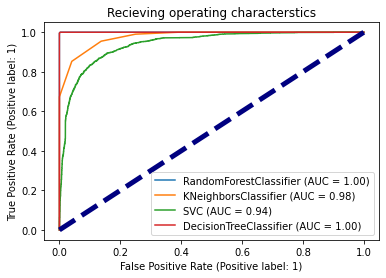

In [82]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 


plt.figure(figsize=(16,9))
disp=plot_roc_curve(rf,x_train,y_train)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(svm,x_train,y_train,ax=disp.ax_)
plot_roc_curve(dt,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.plot([0,1],[0,1],color='navy',lw=5,linestyle='--')
plt.title('Recieving operating characterstics')


### We can say that Random Forest is the best model because it has maximum AUC Score and least difference between Testing accuracy and cross validation score

# Hyperparameter Tuning


In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
params={ 'max_depth':range(2,20),
        'min_samples_leaf':range(2,10),
            'min_samples_split':range(2,15),
            'max_leaf_nodes':range(5,10)}

In [85]:
grd=GridSearchCV(estimator=rf,param_grid=params,n_jobs=-1)

In [87]:
rf=RandomForestClassifier(max_depth=4,min_samples_leaf=2,min_samples_split=2,max_leaf_nodes=9)

In [88]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, max_leaf_nodes=9, min_samples_leaf=2)

In [89]:
metric_score(dt,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:99.855121%


In [90]:
metric_score(dt,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:87.299465%
Classification report
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      1259
           1       0.85      0.87      0.86       985

    accuracy                           0.87      2244
   macro avg       0.87      0.87      0.87      2244
weighted avg       0.87      0.87      0.87      2244



# Saving the best model


In [91]:
import pickle
pickle.dump(rf,open('classmodel_rainfall','wb'))

# ----------------------------------------Prediction for Rainfall--------------------------------------

### Separating features and target variable as x and y

In [92]:
x=df_new.drop(columns=['Rainfall'],axis=1)
y=df_new['Rainfall']

# Data Standardisation

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,-1.509720,0.042356,-0.152725,0.238199,-0.089672,1.232715,0.408486,1.248410,1.400512,0.739067,0.612279,0.186700,-1.614199,-1.666236,-1.382690,1.411950,0.001277,-0.151189,-0.103669,-0.554555,-0.553609
1,-1.509720,-1.076797,0.214923,0.238199,-0.089672,1.445386,0.408486,-0.277996,1.626694,-0.980091,0.398373,-1.441253,-1.449347,-1.183210,-1.264773,0.000357,0.001277,-0.096981,0.325401,-0.554555,-0.553609
2,-1.509720,-0.050906,0.315190,0.238199,-0.089672,1.658056,0.547274,1.248410,1.626694,0.659217,0.826184,-1.803021,-1.174595,-1.682892,-1.113165,0.000357,-1.087619,0.589650,0.136611,-0.554555,-0.553609
3,-1.509720,-0.741051,0.699549,0.238199,-0.089672,-0.681319,-1.278274,0.376178,-1.766037,-0.073879,-0.992013,-1.380959,-1.943902,-0.017286,-0.422506,0.000357,0.001277,0.065642,0.702983,-0.554555,-0.553609
4,-1.509720,0.807112,1.418133,0.238199,-0.089672,1.232715,0.192479,-1.368286,-0.182762,-0.540830,0.184467,0.849941,-1.009743,-1.149898,-1.567989,1.000812,1.522408,0.011434,1.252193,-0.554555,-0.553609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8137,1.027358,-1.934815,-0.069168,0.238199,-0.089672,-1.532000,-0.610933,0.376178,-1.539855,0.128799,-0.778107,-1.019191,-1.504298,1.148639,0.840895,0.000357,0.001277,-1.379898,-0.000692,-0.554555,-0.553609
8138,1.027358,-1.785595,0.248345,0.238199,-0.089672,-0.255978,-1.491242,0.376178,-1.087491,0.128799,-0.992013,-0.717718,-1.669149,0.965422,0.638751,0.000357,0.001277,-1.235344,0.359727,-0.554555,-0.553609
8139,1.027358,-1.449849,0.515725,0.238199,-0.089672,-0.893989,-0.111940,0.376178,1.400512,-0.295081,-0.992013,-0.898602,-1.504298,0.549020,0.251308,0.000357,0.001277,-0.946236,0.634332,-0.554555,-0.553609
8140,1.027358,-1.002187,0.532437,0.238199,-0.089672,0.382034,-0.883824,0.594236,-1.087491,0.128799,-1.205919,-1.019191,-1.504298,0.282523,0.200772,-0.643741,-1.087619,-0.476436,0.617169,-0.554555,-0.553609


# Check for multicollierinity

In [94]:
vif=pd.DataFrame()
vif['vif1']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif

,vif1,features
0,1.171960,Location
1,8.225040,MinTemp
2,25.855065,MaxTemp
3,1.486753,Evaporation
4,2.043024,Sunshine
5,1.601046,WindGustDir
6,2.367923,WindGustSpeed
7,1.357565,WindDir9am
8,1.481114,WindDir3pm
9,1.977371,WindSpeed9am


In [95]:
x=x.drop(columns=['MaxTemp','Temp3pm'],axis=1)

In [96]:
vif=pd.DataFrame()
vif['vif1']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif

,vif1,features
0,1.169688,Location
1,8.149663,MinTemp
2,1.465447,Evaporation
3,2.031299,Sunshine
4,1.597479,WindGustDir
5,2.351459,WindGustSpeed
6,1.344046,WindDir9am
7,1.480117,WindDir3pm
8,1.968031,WindSpeed9am
9,1.987737,WindSpeed3pm


In [97]:
x=x.drop(columns=['Pressure9am'],axis=1)

In [98]:
vif=pd.DataFrame()
vif['vif1']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif

,vif1,features
0,1.169541,Location
1,8.019897,MinTemp
2,1.455763,Evaporation
3,2.018733,Sunshine
4,1.578896,WindGustDir
5,2.328412,WindGustSpeed
6,1.313630,WindDir9am
7,1.409485,WindDir3pm
8,1.966969,WindSpeed9am
9,1.970911,WindSpeed3pm


In [99]:
x=x.drop(columns=['Temp9am'],axis=1)

In [100]:
vif=pd.DataFrame()
vif['vif1']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif

,vif1,features
0,1.151866,Location
1,1.533562,MinTemp
2,1.455043,Evaporation
3,1.977201,Sunshine
4,1.578801,WindGustDir
5,2.279671,WindGustSpeed
6,1.304142,WindDir9am
7,1.406867,WindDir3pm
8,1.889352,WindSpeed9am
9,1.949710,WindSpeed3pm


So, we have solved multicolinearity issue.We can now move ahead for model building.

# Training our model

# Using Linear Regression

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [102]:
lr=LinearRegression()

In [103]:
max_acc=0
max_rs=0

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_lr=lr.predict(x_test)
    accuracy=r2_score(y_test,pred_lr)
    
    if accuracy>max_acc:
        max_acc=accuracy
        max_rs=i
print("Best accuracy is ",max_acc,"at random_state",max_rs)
        

Best accuracy is  0.9160638835829424 at random_state 70


In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=max_rs)

In [105]:
lr.fit(x_train,y_train)


LinearRegression()

In [106]:
pred_test_y=lr.predict(x_test)
print(r2_score(y_test,pred_test_y))

0.9160638835829424


In [107]:
#Finding best cross val score
y_train_pred=lr.predict(x_train)
Train_accuracy=r2_score(y_train,y_train_pred)
Test_accuracy=r2_score(y_test,pred_test_y)


from sklearn.model_selection import cross_val_score

for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")

At cross fold 2 the cv score is 0.8906493854870274
At cross fold 3 the cv score is 0.8895659105334817
At cross fold 4 the cv score is 0.8918544555161405
At cross fold 5 the cv score is 0.8914599346020144
At cross fold 6 the cv score is 0.8906816741432256
At cross fold 7 the cv score is 0.8910154874394826
At cross fold 8 the cv score is 0.8919367552116075
At cross fold 9 the cv score is 0.8908764821046731


In [108]:
# Mean Absolute Error (MAE)
print("MAE:",mean_absolute_error(y_test,pred_test_y))

#Mean Squared Error (MSE)
print("MSE:",mean_squared_error(y_test,pred_test_y))
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred_test_y)))

MAE: 0.19990040063746012
MSE: 0.0880418991966297
RMSE: 0.29671855216118476


# Random Forest Regressor

In [109]:
# Checking R2 score for Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

# prediction
predrf=rf.predict(x_test)
print('R2_Score:',r2_score(y_test,predrf))

# Metric evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predrf))
print('MSE:',metrics.mean_squared_error(y_test, predrf))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predrf)))

R2_Score: 0.939490305039883
MAE: 0.15314099998985392
MSE: 0.06346956103647891
RMSE: 0.25193165945644647


# Decision Tree Regressor

In [110]:
# Checking R2 score for Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

# prediction
preddt=dt.predict(x_test)
print('R2_Score:',r2_score(y_test,preddt))

# Metric evaluation
print('MAE:',metrics.mean_absolute_error(y_test, preddt))
print('MSE:',metrics.mean_squared_error(y_test, preddt))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, preddt)))

R2_Score: 0.8891526700041539
MAE: 0.1311317818022729
MSE: 0.11626949006335673
RMSE: 0.3409831228424022


# GradientBoosting Regressor

In [111]:
# Checking R2 score for GradientBoosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)

# prediction
predgb=gb.predict(x_test)
print('R2_Score:',r2_score(y_test,predgb))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predgb))
print('MSE:',metrics.mean_squared_error(y_test, predgb))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predgb)))

R2_Score: 0.9215894704915634
MAE: 0.1872256168000145
MSE: 0.08224602506786002
RMSE: 0.2867856779336444


# XGB Regressor

In [112]:
# Checking R2 score for XGB Regressor
from xgboost import XGBRegressor as xgb

xgb=xgb(verbosity=0)
xgb.fit(x_train,y_train)

# prediction
predxgb=xgb.predict(x_test)
print('R2_Score:',r2_score(y_test,predxgb))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predxgb))
print('MSE:',metrics.mean_squared_error(y_test, predxgb))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predxgb)))

R2_Score: 0.9309254146664486
MAE: 0.16592875451500344
MSE: 0.07245340788425671
RMSE: 0.26917170706494525


# Cross-Validation

In [113]:
# Checking cv score for Random Forest Regressor
print('Random Forest:',cross_val_score(rf,x,y,cv=5).mean())

# Checking cv score for Decision Tree Regressor
print('Decision Tree:',cross_val_score(dt,x,y,cv=5).mean())

# Checking cv score for Gradient Boosting Regressor
print('Gradient Boosting:',cross_val_score(gb,x,y,cv=5).mean())

# Checking cv score for Linear Regressor
print('Linear Regressor:',cross_val_score(lr,x,y,cv=5).mean())

# Checking cv score for XGBRegressor
print('XGBRegressor:',cross_val_score(xgb,x,y,cv=5).mean())

Random Forest: 0.907668360269461
Decision Tree: 0.8061903548646174
Gradient Boosting: 0.8967720936514538
Linear Regressor: 0.8914599346020144
XGBRegressor: 0.8935574271258725


Based on the model score and the cross val score we have found that RandomForest Regressor as our best fitting model. We will perform Hyper parameter tuning on the best model.

# Hyper parameter tuning

In [114]:
params={'n_estimators':[10,20],
       'max_depth':[10,20],
       'min_samples_split':[3,4,6,7,8]}


In [115]:
clf=GridSearchCV(rf,params)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'max_depth': 20, 'min_samples_split': 3, 'n_estimators': 20}


In [116]:
Rainfall = RandomForestRegressor(max_depth=8,n_estimators=20,min_samples_split=3)
Rainfall.fit(x_train, y_train)
pred = Rainfall.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('MAE:',metrics.mean_absolute_error(y_test, pred))
print('MSE:',metrics.mean_squared_error(y_test, pred))


R2_Score: 92.51140857255803
RMSE value: 0.28026594741241445
MAE: 0.17679019000615512
MSE: 0.07854900127897826


After Hyperparameter Tuning, we have got the accuracy score of 92.51%

# Saving the model

In [117]:
import pickle
pickle.dump(rf,open('regmodel_rainfall','wb'))

# Model Building and Prediction:


### Final Score for Rainfall Tomorrow is : 87.29%


### Final Score for Rainfall is: 92.11%